In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
trainX = np.array(((0,0),(0,1),(1,0),(1,1)))
trainY = np.array((0,1,1,1))

In [3]:
print(trainX.shape)
print(trainY.shape)

(4, 2)
(4,)


In [4]:
trainX = np.transpose(trainX)

trainY = trainY.reshape(1,trainY.shape[0])

print(trainX.shape)
print(trainY.shape)

(2, 4)
(1, 4)


In [5]:
layers = np.array((trainX.shape[0],20,50,30,20,trainY.shape[0]))

print("Model has " +str(layers.shape[0])+ " Layers")
for i in range(1,layers.shape[0]):
  print("Layer " +str(i)+ " has " +str(layers[i])+ " Nodes")

Model has 6 Layers
Layer 1 has 20 Nodes
Layer 2 has 50 Nodes
Layer 3 has 30 Nodes
Layer 4 has 20 Nodes
Layer 5 has 1 Nodes


In [0]:
def initWeights(layers):
  #He Initialization

  L = len(layers)
  param={}

  for i in range(1,L):
    param["W"+str(i)] = np.random.randn(layers[i], layers[i-1]) * np.sqrt(2/layers[i-1])
    param["b"+str(i)] = np.zeros((layers[i],1))

  return param

In [0]:
def forwardActivation(A_prev, W, b, keep_prob, activation):

  Z = np.dot(W,A_prev) + b

  if activation == "relu":
    A = np.maximum(Z,0)
    D = np.random.randn(A.shape[0],A.shape[1])
    D = D < keep_prob
    A = A * D
    A = A / keep_prob

    l_cache = (A_prev, W, b)
    a_cache = (A, Z, D)

  if activation == "sigmoid":
    A = 1/(1+np.exp(-Z))

    l_cache = (A_prev, W, b)
    a_cache = (A, Z)

  
  cache = (l_cache, a_cache)

  return A, cache

In [0]:
def forwardProp(X, param, keep_prob):

  L = len(param)//2
  caches = []
  A = X

  for i in range(1,L):
    A_prev = A
    W = param["W"+str(i)]
    b = param["b"+str(i)]
    A, cache = forwardActivation(A_prev, W, b, keep_prob, activation="relu")
    caches.append(cache)

  W = param["W"+str(L)]
  b = param["b"+str(L)]
  A_last_layer, cache = forwardActivation(A, W, b, keep_prob, activation="sigmoid")
  caches.append(cache)

  return A_last_layer, caches

In [0]:
def computeCost(m, A, Y):

  loss = -(Y*np.log(A)) - ((1-Y)*np.log(1-A))
  loss = np.sum(loss)
  loss = loss/m

  return loss

In [0]:
def backwardActivation(m, dA, Y, cache, keep_prob, activation):

  l_cache, a_cache = cache

  if activation == "sigmoid":
    A_prev, W, b = l_cache
    A, Z = a_cache

    dZ = dA - Y

  if activation == "relu":
    A_prev, W, b = l_cache
    A, Z, D = a_cache

    dA = dA * D
    dA = dA / keep_prob
    dZ = np.multiply(dA, np.int64(A > 0))


  dW = (np.dot(dZ,A_prev.T)/m)
  db = np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(W.T,dZ)

  return dA_prev, dW, db

In [0]:
def backwardProp(m, A, Y, keep_prob, caches):

  grads= {}
  L = len(caches)
  m = A_last_layer.shape[1]

  dA_current = -(np.divide(Y,A) - np.divide((1-Y),(1-A)))
  cache_last_layer = caches[-1]

  dA_prev, dW, db = backwardActivation(m, dA_current, Y, cache_last_layer, keep_prob, activation="sigmoid")
  grads["dA" +str(L-1)] = dA_prev
  grads["dW" +str(L)] = dW
  grads["db" +str(L)] = db

  for i in reversed(range(L-1)):
    dA_current = grads["dA" +str(i+1)]
    cache_current_layer = caches[i]

    dA_prev, dW, db = backwardActivation(m, dA_current, Y, cache_current_layer, keep_prob, activation="relu")
    grads["dA" +str(i)] = dA_prev
    grads["dW" +str(i+1)] = dW
    grads["db" +str(i+1)] = db 

  return grads

In [0]:
def optimize(lr, param, grads):

  L = len(param)//2

  for i in range(1,L):
    param["W" +str(i)] = param["W" +str(i)] - lr*grads["dW" +str(i)]
    param["b" +str(i)] = param["b" +str(i)] - lr*grads["db" +str(i)]

  return param

Enter the learning rate: 0.0005
Enter the number of iterations: 100
Enter the Keep Probability: 0.9
0.8720091633933288
0.5578810444082648
0.6981544716654289
0.6132715716325383
0.245257593773409
0.3344217050172513
0.2771643795987974
0.3757469555040641
0.36977811146641626


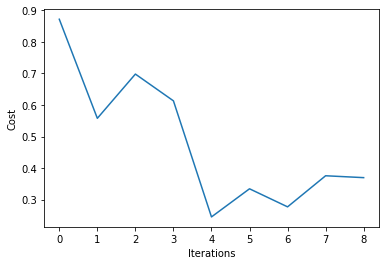

In [77]:
lr = float(input("Enter the learning rate: "))
iter = int(input("Enter the number of iterations: "))
keep_prob = float(input("Enter the Keep Probability: "))

m = trainX.shape[1]
cost_plot = []

param = initWeights(layers)
#param contains W and B for each layer

for i in range(1,iter):

  A_last_layer, caches = forwardProp(trainX, param, keep_prob)

  cost = computeCost(m, A_last_layer, trainY)
  if i%10 == 0:
    cost_plot.append(cost)
    print(cost)

  grads = backwardProp(m, A_last_layer, trainY, keep_prob, caches)
  #grads contains dW and db for each layer

  param = optimize(lr, param ,grads)


plt.plot(cost_plot)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [80]:
print("Predicted value for each case: " +str(A_last_layer))
print("Actual values: \t\t" +str(trainY))

Predicted value for each case: [[0.60932329 0.98087323 0.98888756 0.99594619]]
Actual values: 		[[0 1 1 1]]
